In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import defaultdict
from gensim.models import doc2vec 
from tqdm import tqdm
import networkx as nx
import pandas as pd
from pylab import rcParams

In [37]:
def get_icd10_codes():
    icd10 = defaultdict()
    with open('/Users/michalkukielka/Desktop/licencjat/results/icd10cm_codes_2018.txt', 'r+') as f:
        for line in f.readlines():
            line = line.split()
            icd10[line[0].lower()] = ' '.join(line[1:]).lower()
        return icd10

    
def create_relations_plot(path_to_model, path_to_graph, glove_model, output_file):
    rcParams['figure.figsize'] = 20, 15
    icd10_codes = get_icd10_codes()
    if glove_model:
        # load glove model
        vectors = pd.read_csv(path_to_model, header=None, names=['word', 'x', 'y'], sep=' ')
        plot_data = vectors[vectors.word.isin(icd10_codes)]
        graph = nx.read_edgelist(path_to_graph)
    else:
        # load doc2vec model
        model = doc2vec.Doc2Vec.load(path_to_model)
        graph = nx.read_edgelist(path_to_graph)
        vectors = []
        for code in graph.nodes:
            x, y = model.wv.get_vector(code)
            vectors.append([code, x, y])
        plot_data = pd.DataFrame(vectors, columns=['word', 'x', 'y'])

    components = list(nx.connected_component_subgraphs(graph))
    # pick only relations, which contain at least 3 nodes
    big_components = list(filter(lambda x: len(x.nodes) > 2, components))
    for component in big_components:
        choosen_vectors = plot_data[plot_data.word.isin(component.nodes)]
        for _, row in choosen_vectors.iterrows():
            plt.scatter(choosen_vectors.x, choosen_vectors.y, cmap=plt.get_cmap('Spectral'))
            x, y, label = row.x, row.y, row.word
            plt.annotate(
                label,
                xy=(x,y),
                xytext=(-14, 14),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
            )
    plt.savefig(output_file, format='svg')
    

def create_histogram_of_relations_size(path_to_graph, output_file):
    rcParams['figure.figsize'] = 12, 8
    rcParams['axes.labelsize'] = 'xx-large'
    graph = nx.read_edgelist(path_to_graph)
    _, _, _ = plt.hist([len(i) for i in list(nx.connected_component_subgraphs(graph))], bins=6, range=(0, 6))
    plt.xlabel('Liczba kodów składających się na relację')
    plt.ylabel('Liczba relacji')
    plt.savefig(output_file, format='svg')


GloVe

In [11]:
model_glove_150 = '/Users/michalkukielka/Desktop/licencjat/results/glove_data/symmetric_vectors/glove_vectors150.txt'
graph_glove_150 = '/Users/michalkukielka/Desktop/licencjat/scripts/glove_analysis/150/graph_glove_200'
model_glove_50 = '/Users/michalkukielka/Desktop/licencjat/results/glove_data/symmetric_vectors/glove_vectors50.txt'
graph_glove_50 = '/Users/michalkukielka/Desktop/licencjat/scripts/glove_analysis/50/graph_glove_200'

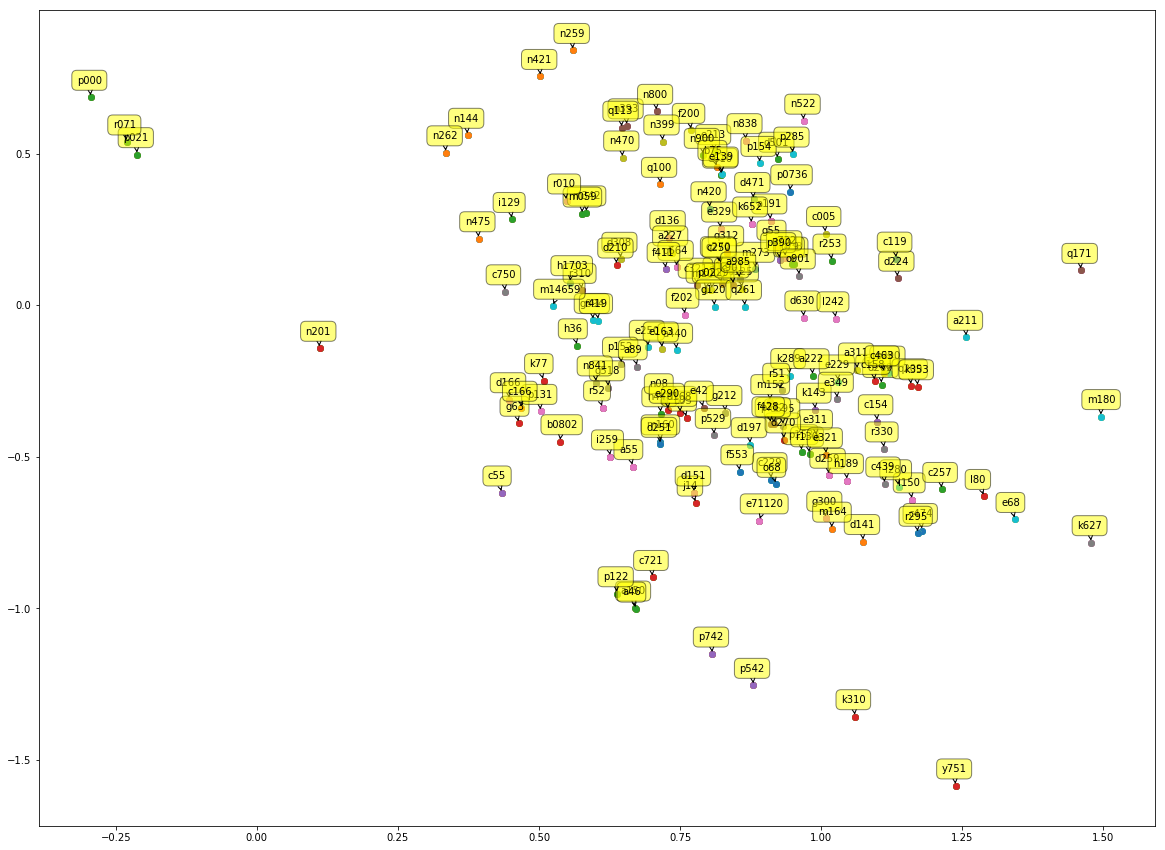

In [13]:
create_relations_plot(path_to_model=model_glove_50, path_to_graph=graph_glove_50,
                      glove_model=True, output_file='map_glove50_200.svg')

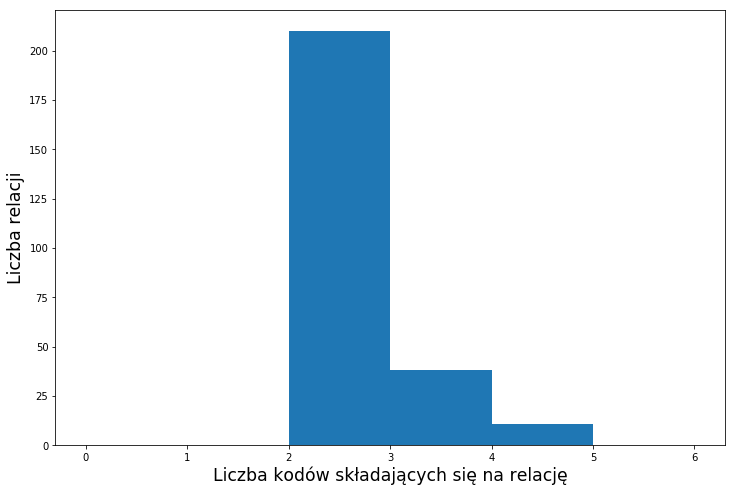

In [39]:
create_histogram_of_relations_size(graph_glove_50, 'plots/hist_glove50_200.svg')

Doc2Vec

In [5]:
model_doc2vec_150 = '/Users/michalkukielka/Desktop/licencjat/results/doc2vec_data/model150_trained_cbow'
graph_doc2vec_150 = '/Users/michalkukielka/Desktop/licencjat/scripts/doc2vec_analysis/cbow/150/graph_200'
model_doc2vec_50 = '/Users/michalkukielka/Desktop/licencjat/results/doc2vec_data/model50_trained_cbow'
graph_doc2vec_50 = '/Users/michalkukielka/Desktop/licencjat/scripts/doc2vec_analysis/cbow/50/graph_200'

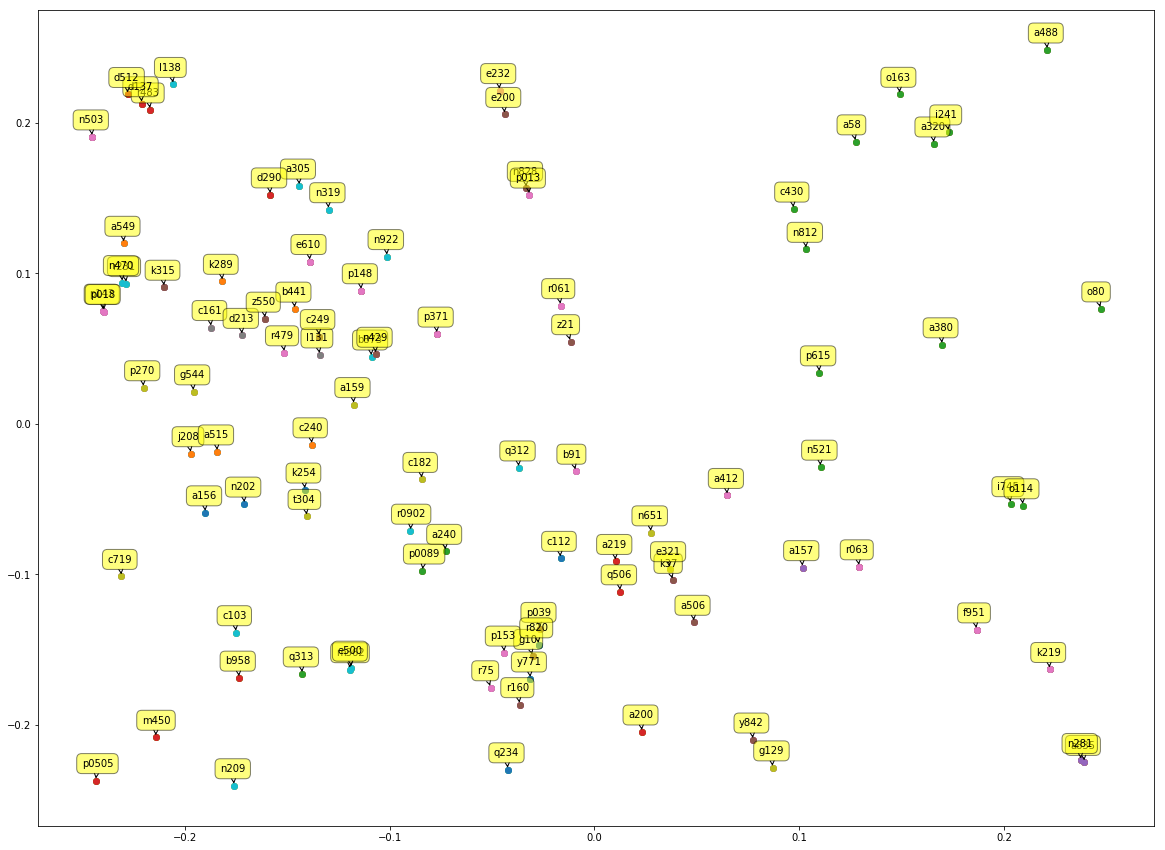

In [10]:
create_relations_plot(path_to_model=model_doc2vec_50, path_to_graph=graph_doc2vec_50,
                      glove_model=False, output_file='map_doc2vec50_200.svg')

In [ ]:
create_histogram_of_relations_size(graph_doc2vec_50, 'plots/hist_doc2vec50_200.svg')